In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from dynamic_reparameterization.DynamicReparameterizationNet import DynamicReparameterizationNet

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [4]:
model = DynamicReparameterizationNet([3, 64, 64, 64, 2], H=1, sparsity=0.9, Np=300, fractional_tolerence=0.1)

In [5]:
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.001, weight_decay=0.001, epochs_reallocate=100)

Epoch 0: 2.440216302871704
Sparsity: 0.9002584591507912 

Epoch 100: 0.13119937479496002
Sparsity: 0.9002584591507912 

Epoch 200: 0.10164617002010345
Sparsity: 0.9002584591507912 

Epoch 300: 0.12802600860595703
Sparsity: 0.9002584591507912 

Epoch 400: 0.10307986289262772
Sparsity: 0.9002584591507912 



In [10]:
y_pred = model(test_data.x).detach().numpy()

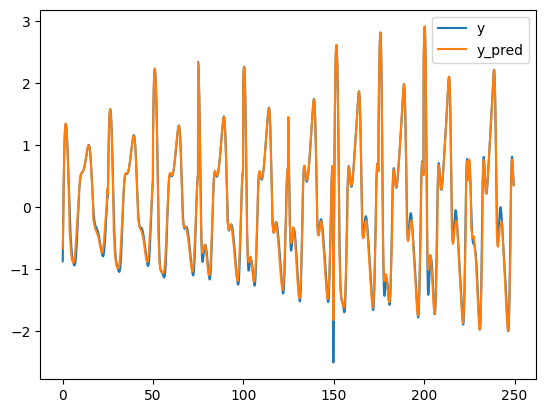

In [11]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()